<h1 style="font-family:'Poppins', Arial, sans-serif; font-weight:700; color:#1e8449; text-align:center; margin-bottom:20px; letter-spacing:1px; font-size:40px;">👨‍💻 Author: <span style="color:#0cd865;">Ali Hassan</span></h1>

<div style="text-align:center; margin-top:20px; line-height:3; font-size:18px;">
  <span style="margin-right:8px;"></span><a href="https://github.com/Ali-Shahzadd"><img src="https://img.shields.io/badge/GitHub-Profile-181717?style=flat-square&logo=github&logoColor=white" alt="GitHub" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.kaggle.com/alihassanshahzad786"><img src="https://img.shields.io/badge/Kaggle-Profile-20BEFF?style=flat-square&logo=kaggle&logoColor=white" alt="Kaggle" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.linkedin.com/in/ali-hassan-3952a2290/"><img src="https://img.shields.io/badge/LinkedIn-Profile-0077B5?style=flat-square&logo=linkedin&logoColor=white" alt="LinkedIn" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://x.com/alishahzadddd?s=21"><img src="https://img.shields.io/badge/Twitter-Profile-1DA1F2?style=flat-square&logo=twitter&logoColor=white" alt="Twitter" style="height:30px;"></a>
</div>




<h1 style="color: orange;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">
Fashion MNIST Image Classification
</h1>


| <img src="https://pub.mdpi-res.com/mathematics/mathematics-12-03174/article_deploy/html/images/mathematics-12-03174-g001.png?1728631905" alt="Plant" style="width:180px;height:auto;border-radius:8px;box-shadow:0 2px 4px rgba(0,0,0,0.2);margin:5px;"> | <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQgk_z6HRPWesOggEpZTHHwzYh1U1KoqmiCcQ&s" alt="Plant" style="width:180px;height:auto;border-radius:8px;box-shadow:0 2px 4px rgba(0,0,0,0.2);margin:5px;"> | <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSGY_9d8BxkZS-8IwvZWnFWL2mER_-C_T9o_A&s" alt="Plant" style="width:180px;height:auto;border-radius:8px;box-shadow:0 2px 4px rgba(0,0,0,0.2);margin:5px;"> | <img src="https://machinelearningmastery.com/wp-content/uploads/2019/05/sample_image.png" alt="Plant" style="width:180px;height:auto;border-radius:8px;box-shadow:0 2px 4px rgba(0,0,0,0.2);margin:5px;"> |
|---|---|---|---|


### Author: `Ali Hassan`

<div style="font-family:Arial, sans-serif; color:green; font-size:20px;  line-height:1.6; letter-spacing:0.5px; padding:5px 0;">
  <ul style="list-style-type:disc; padding-left:20px; margin:0;">
    <li style="margin-bottom:6px;">The Datatype of <b>train_images</b> is <code>numpy array</code></li>
    <li style="margin-bottom:6px;">The Datatype of <b>train_labels</b> is <code>numpy array</code></li>
    <li style="margin-bottom:6px;">Converted the <b>Image Shape</b> into <code>(28,28,1)</code></li>
    <li style="margin-bottom:6px;">Using the <b>CNN</b> Model</li>
    <li style="margin-bottom:6px;">Test Accuracy is <b>92.00%</b></li>
    <li style="margin-bottom:6px;">Test Loss is <b>21%</b></li>
  </ul>
</div>



<h3 style="color: brown;font-family: 'Times New Roman', Times, serif; font-weight: bold;">Import Libraries</h3>

In [29]:
import pandas as pd

import numpy as np
np.random.seed(0)


import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

import os,random
random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

from tensorflow.keras import datasets
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Model,load_model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Loading and Preparing the Fashion MNIST Dataset</h3>

In [30]:
fashion_mnist=datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Data Processing</h3>

In [31]:
type(train_images)

numpy.ndarray

In [32]:
type(train_labels)

numpy.ndarray

In [33]:
train_images.shape

(60000, 28, 28)

In [34]:
test_images.shape

(10000, 28, 28)

In [35]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Displaying the Images from the Datasets</h3>

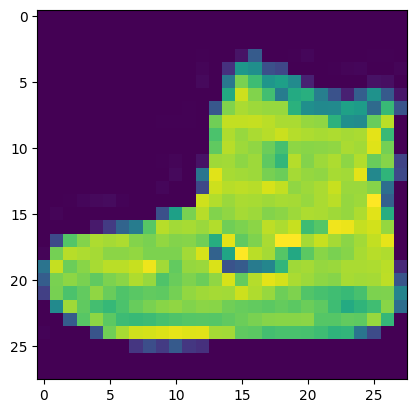

In [36]:
plt.imshow(train_images[0])
plt.show()

In [37]:
print(train_labels[0])

9


<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Normalizing the values</h3>

In [38]:
# Normalizing  to convert it between 0 and 1
train_images=train_images/255
test_images=test_images/255

In [39]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Reshaping the image to single color tone (grayscale) (29,28,1)</h3>

In [40]:
# reshaping the image to specify that its is single channel image (gray scale image) (1)
train_images=train_images.reshape(train_images.shape[0],28,28,1)
test_images=test_images.reshape(test_images.shape[0],28,28,1)

print("train images: ",train_images.shape)
print("test images: ",test_images.shape)

train images:  (60000, 28, 28, 1)
test images:  (10000, 28, 28, 1)


<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Building the CNN Model</h3>

In [41]:
model = models.Sequential()

# Convolutional block 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Convolutional block 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Convolutional block 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

# Flatten + Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# Output Layer
model.add(layers.Dense(10, activation='softmax'))


In [42]:
# Compiling the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Training the Model</h3>

In [43]:
early_stop = EarlyStopping(
    monitor='val_loss',   # Watch validation loss
    patience=5,           # Stop if no improvement for 5 epochs
    restore_best_weights=True
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',   # Watch validation loss
    factor=0.5,           # Reduce LR by half
    patience=3,           # If val_loss doesn't improve for 3 epochs
    min_lr=1e-5,          # Don't go below this LR
    verbose=1
)


In [44]:
history = model.fit(
    train_images, train_labels,
    validation_data=(test_images, test_labels),
    epochs=20,
    callbacks=[early_stop, lr_scheduler]
)


Epoch 1/20
1875/1875 [==============================] - 20s 10ms/step - loss: 0.5974 - accuracy: 0.7889 - val_loss: 0.3722 - val_accuracy: 0.8625 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4047 - accuracy: 0.8537 - val_loss: 0.3297 - val_accuracy: 0.8785 - lr: 0.0010
Epoch 3/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3597 - accuracy: 0.8712 - val_loss: 0.3222 - val_accuracy: 0.8783 - lr: 0.0010
Epoch 4/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3348 - accuracy: 0.8787 - val_loss: 0.3469 - val_accuracy: 0.8647 - lr: 0.0010
Epoch 5/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3227 - accuracy: 0.8835 - val_loss: 0.2860 - val_accuracy: 0.8935 - lr: 0.0010
Epoch 6/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3062 - accuracy: 0.8897 - val_loss: 0.3054 - val_accuracy: 0.8842 - lr: 0.0010
Epoch 7/20
1875/1875 [========================

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Model Evaluation</h3>

In [45]:
# Model Evaluation
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print("\nTest Accuracy: ",test_acc)

313/313 - 1s - loss: 0.2190 - accuracy: 0.9206 - 1s/epoch - 4ms/step

Test Accuracy:  0.9205999970436096


<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Plots for Training and Validation Data Accuracy</h3>

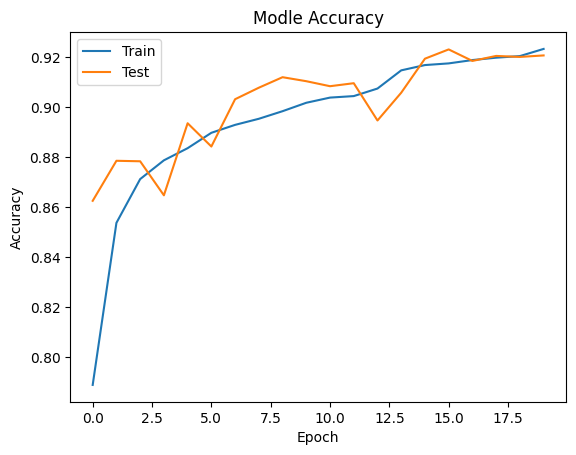

In [46]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Modle Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Plots for Training and Validation Loss</h3>

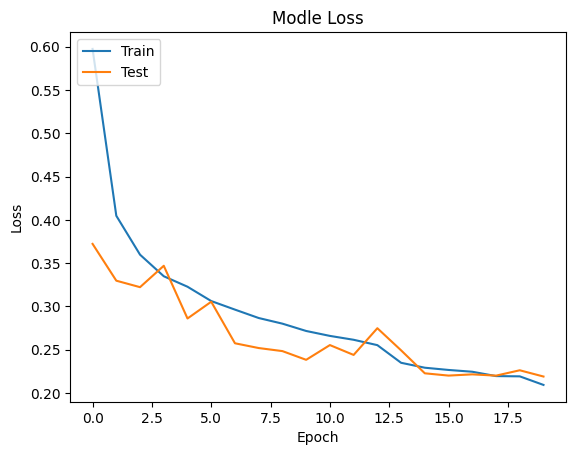

In [47]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Modle Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Saving the Model</h3>

In [48]:
model.save('Model Saved/fashion_mnist.h5')